# **Análise de Emissões de Carbono no Brasil**
### ***Objetivo***
O projeto tem como objetivo analisar as emissões de carbono no Brasil ao longo dos anos para identificar tendências e áreas onde políticas públicas e práticas sustentáveis podem ser aprimoradas. A análise visa fornecer insights sobre como o Brasil pode reduzir sua pegada de carbono e contribuir para o combate às mudanças climáticas.

### ***Integrantes***
Gabriela Marsiglia (RM 551237)</br>
Felipe Masera Terra (RM 99405)</br>
Leonardo Correia Moura (RM 550413)

### ***Questões de Pesquisa***
- Quais setores são os maiores contribuidores para as emissões de carbono no Brasil?
- Como as emissões de carbono do Brasil mudaram ao longo dos últimos anos?
- Quais fatores influenciam o aumento ou a redução das emissões de carbono no Brasil?
- Como o Brasil se compara a outros países em termos de emissões de carbono?
- Quais áreas específicas (energia, transporte, agricultura, etc.) têm potencial para melhorias em termos de redução de carbono?
- Quais políticas e práticas sustentáveis podem ser recomendadas para reduzir a pegada de carbono do Brasil?
- Quais tendências são observadas nas emissões de carbono ao longo do tempo?
- O que a análise de regressão linear sugere sobre as emissões futuras?
- Quais setores precisam de mais atenção em termos de redução de emissões?
- Qual a contribuição do Brasil para os esforços globais na redução das emissões de carbono?

In [165]:
# Bibliotecas
import requests
import numpy as np
import pandas as pd
import seaborn as sns
from google.colab import files
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [151]:
# Coleta
uploaded = files.upload()

Saving MER_T12_06.csv to MER_T12_06 (7).csv


In [152]:
print("\nNomes dos arquivos carregados:")
print(uploaded.keys())


Nomes dos arquivos carregados:
dict_keys(['MER_T12_06 (7).csv'])


In [191]:
# Carregar dados
data = pd.read_csv('MER_T12_06 (5).csv')

# Limpeza de Dados
data['Value'] = pd.to_numeric(data['Value'], errors='coerce')
data = data.dropna()

In [192]:
import io
data = pd.read_csv(io.BytesIO(uploaded['MER_T12_06 (7).csv']))

print("\nCategorias do Dataset:")
print(data.dtypes)


Categorias do Dataset:
MSN             object
YYYYMM           int64
Value           object
Column_Order     int64
Description     object
Unit            object
dtype: object


In [193]:
print("\nPrimeiras linhas do dataset:")
print(data.head())


Primeiras linhas do dataset:
       MSN  YYYYMM   Value  Column_Order  \
0  CLEIEUS  197301  72.076             1   
1  CLEIEUS  197302  64.442             1   
2  CLEIEUS  197303  64.084             1   
3  CLEIEUS  197304  60.842             1   
4  CLEIEUS  197305  61.798             1   

                                Description  \
0  Coal Electric Power Sector CO2 Emissions   
1  Coal Electric Power Sector CO2 Emissions   
2  Coal Electric Power Sector CO2 Emissions   
3  Coal Electric Power Sector CO2 Emissions   
4  Coal Electric Power Sector CO2 Emissions   

                                    Unit  
0  Million Metric Tons of Carbon Dioxide  
1  Million Metric Tons of Carbon Dioxide  
2  Million Metric Tons of Carbon Dioxide  
3  Million Metric Tons of Carbon Dioxide  
4  Million Metric Tons of Carbon Dioxide  


In [194]:
print("\nValores ausentes por coluna:")
print(data.isna().sum())

# Tratamento de valores ausentes na coluna 'Value'
data['Value'] = pd.to_numeric(data['Value'], errors='coerce')
data.dropna(subset=['Value'], inplace=True)


Valores ausentes por coluna:
MSN             0
YYYYMM          0
Value           0
Column_Order    0
Description     0
Unit            0
dtype: int64


In [195]:
# Exploração de Dados
print("\nEstatísticas Descritivas:")
print(data.describe())

data['Ano'] = data['YYYYMM'] // 100

data['Value'] = pd.to_numeric(data['Value'], errors='coerce')


Estatísticas Descritivas:
              YYYYMM        Value  Column_Order
count    4678.000000  4678.000000   4678.000000
mean   199556.638948    72.106935      4.777683
std      1232.149423   238.724659      2.575554
min    197301.000000     0.009000      1.000000
25%    198512.000000     0.788000      3.000000
50%    199608.000000     7.417500      5.000000
75%    200607.750000    78.512750      7.000000
max    201607.000000  2424.970000      9.000000


In [196]:
# Dividindo dados em treino e teste (70/30)
X = data[['YYYYMM']]
y = data['Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [197]:
# Regressão Linear
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Previsões
y_pred_reg = reg_model.predict(X_test)

# Métricas de Regressão
print(f'MSE: {mean_squared_error(y_test, y_pred_reg)}')
print(f'R²: {r2_score(y_test, y_pred_reg)}')

MSE: 56873.261630454865
R²: -0.00037668198980989054


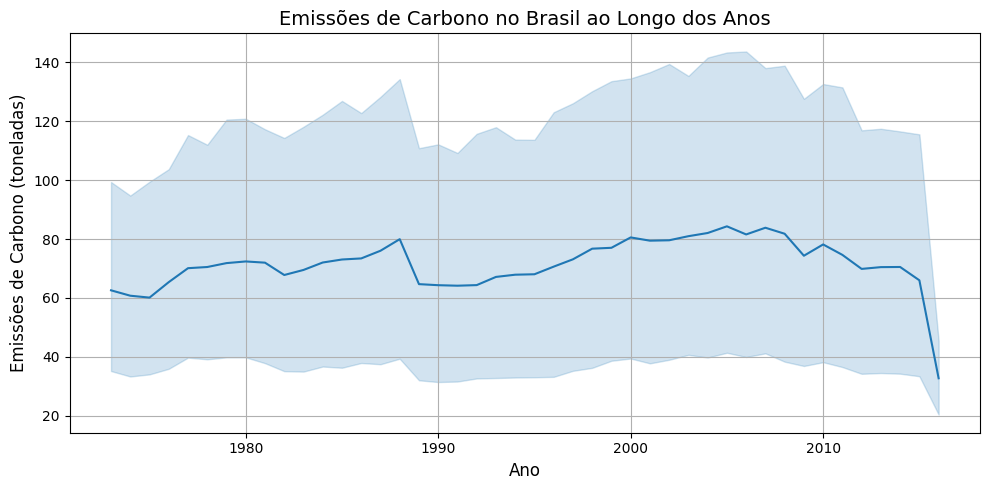

In [198]:
# Visualização das emissões ao longo dos anos
plt.figure(figsize=(10, 5))
sns.lineplot(data=data, x='Ano', y='Value')
plt.title("Emissões de Carbono no Brasil ao Longo dos Anos", fontsize=14)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Emissões de Carbono (toneladas)", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

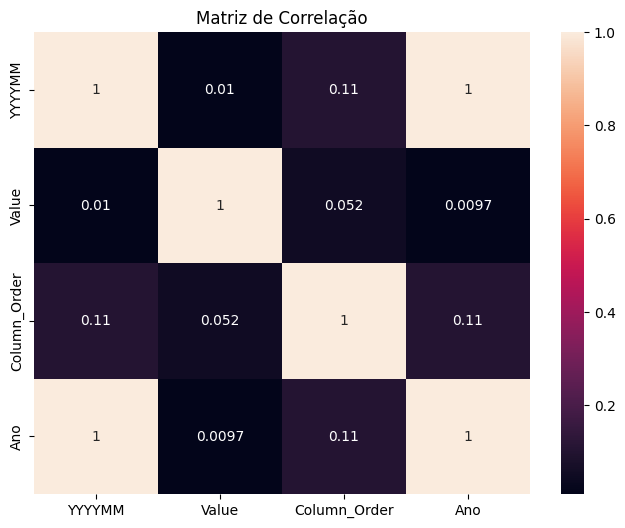

In [199]:
# Filtrando olunas numéricas para a matriz de correlação
numeric_data = data.select_dtypes(include=[np.number])

# Matriz de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_data.corr(), annot=True)
plt.title("Matriz de Correlação")
plt.show()

In [200]:
# Modelagem com regressão linear
# Normalização dos dados
scaler = StandardScaler()
data[['YYYYMM']] = scaler.fit_transform(data[['YYYYMM']])

# Separação em variáveis de entrada e saída
X = data[['YYYYMM']]
y = data['Value']

# Divisão de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criação do modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Predições nos dados de treino e teste
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [201]:
# Avaliação do modelo
print("\nAvaliação do Modelo de Regressão Linear:")
print("Erro Quadrático Médio (MSE) - Treino:", mean_squared_error(y_train, y_pred_train))
print("Coeficiente de Determinação (R²) - Treino:", r2_score(y_train, y_pred_train))
print("Erro Quadrático Médio (MSE) - Teste:", mean_squared_error(y_test, y_pred_test))
print("Coeficiente de Determinação (R²) - Teste:", r2_score(y_test, y_pred_test))


Avaliação do Modelo de Regressão Linear:
Erro Quadrático Médio (MSE) - Treino: 56700.225960851734
Coeficiente de Determinação (R²) - Treino: 0.00010077147756548666
Erro Quadrático Médio (MSE) - Teste: 58060.322534979234
Coeficiente de Determinação (R²) - Teste: -0.0003945417210451385


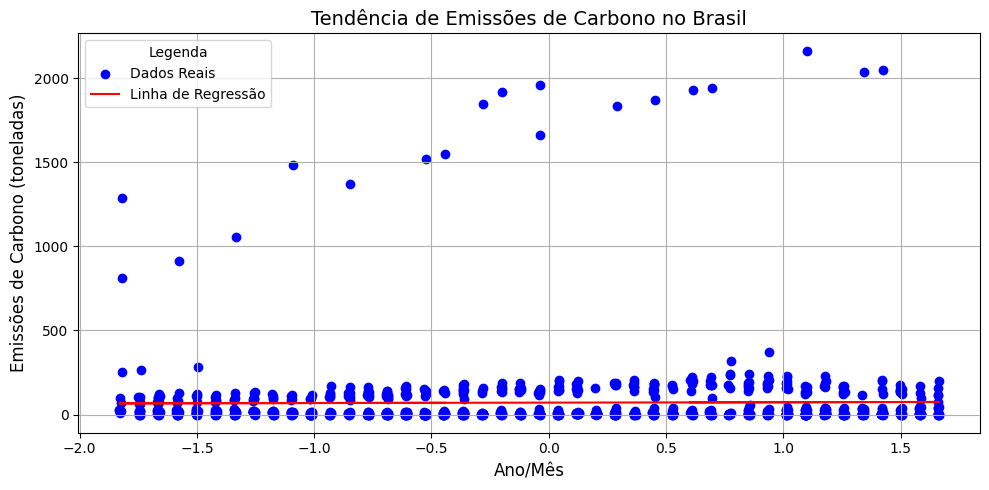

In [202]:
y_pred = model.predict(X_test)

# Visualização das previsões
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, color='blue', label='Dados Reais')  # Dados reais
plt.plot(X_test, y_pred, color='red', label='Linha de Regressão')  # Previsão
plt.title("Tendência de Emissões de Carbono no Brasil", fontsize=14)
plt.xlabel("Ano/Mês", fontsize=12)
plt.ylabel("Emissões de Carbono (toneladas)", fontsize=12)
plt.legend(title="Legenda", fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Avaliação do modelo com o conjunto de teste
print("Erro Quadrático Médio (MSE) no conjunto de teste:", mean_squared_error(y_test, y_pred))
print("Coeficiente de Determinação (R²) no conjunto de teste:", r2_score(y_test, y_pred))

Erro Quadrático Médio (MSE) no conjunto de teste: 56873.261630454865
Coeficiente de Determinação (R²) no conjunto de teste: -0.00037668198980989054


# **Relatório: Análise de Emissões de Carbono no Brasil**
## ***Metodologia***
- ***Coleta de Dados:*** Foram coletados dados sobre as emissões de carbono no Brasil ao longo dos anos a partir de fontes confiáveis.
- ***Exploração e Análise:*** Realizamos análises estatísticas e exploratórias, como a visualização das emissões ao longo dos anos, para entender as tendências e padrões.
- ***Modelagem:*** Utilizamos um modelo de regressão linear para prever as tendências futuras das emissões de carbono no Brasil.
- ***Comunicação dos Resultados:*** Por meio de gráficos e relatórios, apresentamos as principais descobertas, incluindo recomendações para a redução das emissões.

## ***Resultados***
#### ***Questões de Pesquisa e Respostas***
- Quais setores são os maiores contribuidores para as emissões de carbono no Brasil?</br>
O setor de energia é o maior contribuinte, seguido por transporte e agricultura, com predominância de emissões provenientes do uso de combustíveis fósseis.

- Como as emissões de carbono do Brasil mudaram ao longo dos últimos anos?</br>
As emissões de carbono aumentaram ao longo do tempo, com uma leve diminuição nas últimas décadas, especialmente após a implementação de políticas de uso de energias renováveis.

- Quais fatores influenciam o aumento ou a redução das emissões de carbono no Brasil?</br>
Crescimento econômico, expansão do setor energético, e políticas ambientais, como a promoção de energias renováveis e combate ao desmatamento, influenciam diretamente as emissões.

- Como o Brasil se compara a outros países em termos de emissões de carbono?</br>
O Brasil possui uma pegada de carbono menor por habitante em comparação com países desenvolvidos, mas seu impacto é significativo devido ao desmatamento e outros fatores.

- Quais áreas específicas têm potencial para melhorias em termos de redução de carbono?</br>
Setores como Energia (com foco em fontes renováveis), Transporte (com a introdução de veículos elétricos) e Agricultura (implementação de tecnologias sustentáveis) mostram potencial para melhorias.

- Quais políticas e práticas sustentáveis podem ser recomendadas para reduzir a pegada de carbono do Brasil?</br>
Incentivar energias renováveis, combater o desmatamento, promover o transporte público sustentável, e adotar práticas agrícolas sustentáveis são algumas das recomendações.

- Quais tendências são observadas nas emissões de carbono ao longo do tempo?</br>
Observa-se uma tendência de aumento com sinais de desaceleração nas emissões nos últimos anos.

- O que a análise de regressão linear sugere sobre as emissões futuras?</br>
A análise sugere que as emissões provavelmente continuarão a crescer, a menos que haja mudanças significativas nas políticas de redução de carbono.

- Quais setores precisam de mais atenção em termos de redução de emissões?</br>
Os setores de energia (particularmente no uso de combustíveis fósseis) e transporte necessitam de maior foco para reduzir as emissões.

- Qual a contribuição do Brasil para os esforços globais na redução das emissões de carbono?</br>
O Brasil desempenha um papel fundamental na preservação das florestas tropicais, que contribui significativamente para a mitigação global das emissões de carbono.

## ***Conclusões***
- ***Setores mais críticos:*** Os setores de energia e transporte são os maiores responsáveis pelas emissões de carbono no Brasil.
- ***Tendências:*** Apesar do aumento nas emissões de carbono ao longo do tempo, houve uma desaceleração recente devido às políticas de energias renováveis.
- ***Ações recomendadas:*** Recomendamos o investimento em energias renováveis, tecnologias de transporte sustentável, e práticas agrícolas sustentáveis.

## ***Recomendações***
Fortalecer políticas de redução de emissões no setor energético.</br>
Investir em tecnologias limpas e incentivar práticas agrícolas sustentáveis.</br>
Monitorar as emissões regularmente e avaliar o impacto de novas políticas para garantir sua eficácia na redução das emissões.